# STA 142A Homework 2 

# Truc Le and Alexander Chernikov


In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import random
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

## Problem 1: Poisson Classifier for Multiclass Classification

\begin{equation*}
P(Y = 1|X) = \frac{(\beta X)^{k}}{k!}e^{-(\beta X)}
\end{equation*}


### (a) 

The above multi-class classfication model uses a discriminative approach, since we are told that the model provides the conditional distribution of the output Y given X. In addition, we know that the standard model for Y is the Poisson regression, and Poisson regression is a generalized linear model form of regression analysis use to make model for count data [1](https://en.wikipedia.org/wiki/Poisson_regression). We know that discriminitive model is use to for regression, therefore, the Poisson regression model above uses discriminitive approach.

### (b)

$$L(\beta; x_{1},...,x_{n}) = \prod_{i=1}^{n}\frac{(\beta X)^{k_i}}{k_{i}!}e^{-(\beta X)}$$ <br>
$$l(\beta; x_{1},...,x_{n}) = ln(\prod_{i=1}^{n}\frac{(\beta X)^{k_i}}{k_{i}!}e^{-(\beta X)})$$ <br>
$$l(\beta; x_{1},...,x_{n}) = \prod_{i=1}^{n}[ln((\beta X)^{k_i})+ln(e^{-(\beta X)})-ln(k_{i}!)]$$ <br>
$$l(\beta; x_{1},...,x_{n}) = \prod_{i=1}^{n}[k_iln(\beta X)-\beta X-ln(k_i!)]$$ <br>
$$l(\beta; x_{1},...,x_{n}) = -n(\beta X) + ln(\beta X)\sum_{i=1}^{n}k_i - \sum_{i=1}^{n}ln(k_{i}!)$$ <br> 
$$\frac{d}{d\beta}l(\beta; x_{1},...,x_{n}) = \frac{d}{d\beta}(-n(\beta X) + ln(\beta X)\sum_{i=1}^{n}k_i - \sum_{i=1}^{n}ln(k_{i}!))$$ <br>
$$\frac{d}{d\beta}l(\beta; x_{1},...,x_{n}) = -nX + \frac{1}{\beta}\sum_{i=1}^{n}k_i$$ <br> 
$$-nX + \frac{1}{\beta}\sum_{i=1}^{n}k_i = 0$$ <br>
$$\frac{1}{\beta}\sum_{i=1}^{n}k_i = nX$$ <br>
$$\hat{\beta} = \frac{1}{nX}\sum_{i=1}^{n}k_i$$



### (c)

When given a new sample x, in order to decide which class it belongs to we must log-odd ratio of the given formula.

\begin{equation*}
log\frac{p(Y=1|X)}{p(Y=-1|X)} = log(\frac{\frac{(\beta X)^{k}}{k!}e^{-(\beta X)}}{1-\frac{(\beta X)^{k}}{k!}e^{-(\beta X)}})
= log(\frac{1}{e^{2\beta X}})= -2\beta X
\end{equation*}

The log-odd is a linear function in the case of Poisson Regression. Hence, Poisson regression is equivalent of linear regression in a way for classification.

## Problem 2: Logistic Regression versus LDA.

In [ ]:
# generating 100 random x values

# function to create the data 
def data(mu):
    # binomial distribution
    s = np.random.binomial(1, 0.5, 100)
    unique, counts = np.unique(s, return_counts=True)
    df = []
    # t-distribution
    x1 = np.random.standard_t(df=1,size=100) + mu
    x2 = np.random.standard_t(df=1,size=100)
    for i in x1[:counts[1]]:
        t = []
        t.append(i)
        t.append(1)
        df.append(t)
        
    for c in x2[:counts[0]]:
        tt = []
        tt.append(c)
        tt.append(-1)
        df.append(tt)
        
    return np.array(df)

# doing the 100 trials runs for mu =1, 2, 3 for LDA
bin1 = []
for i in range(100):
    train = data(mu=1)
    test = data(mu=1)
    x_train = train[:,0]
    y_train = train[:,1]
    x_test = test[:,0]
    y_test = test[:,1]
    # LDA
    clf = LinearDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis(solver='svd')
    y_pred = lda.fit(x_train.reshape(-1,1), y_train).predict(x_test.reshape(-1,1))
    error = 100 - np.sum(y_test == y_pred)
    bin1.append(error)


bin2 = []
for i in range(100):
    train = data(mu=2)
    test = data(mu=2)
    x_train = train[:,0]
    y_train = train[:,1]
    x_test = test[:,0]
    y_test = test[:,1]
    # LDA
    clf = LinearDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis(solver='svd')
    y_pred = lda.fit(x_train.reshape(-1,1), y_train).predict(x_test.reshape(-1,1))
    error = 100 - np.sum(y_test == y_pred)
    bin2.append(error) 


bin3 = []
for i in range(100):
    train = data(mu=3)
    test = data(mu=3)
    x_train = train[:,0]
    y_train = train[:,1]
    x_test = test[:,0]
    y_test = test[:,1]
    # LDA
    clf = LinearDiscriminantAnalysis()
    lda = LinearDiscriminantAnalysis(solver='svd')
    y_pred = lda.fit(x_train.reshape(-1,1), y_train).predict(x_test.reshape(-1,1))
    error = 100 - np.sum(y_test == y_pred)
    bin3.append(error)


In [ ]:
# doing the 100 trials runs for mu =1, 2, 3 for Logistic Regression
# function to create the data 
def data(mu):
    # binomial distribution
    s = np.random.binomial(1, 0.5, 100)
    unique, counts = np.unique(s, return_counts=True)
    df = []
    # t-distribution
    x1 = np.random.standard_t(df=1,size=100) + mu
    x2 = np.random.standard_t(df=1,size=100)
    for i in x1[:counts[1]]:
        t = []
        t.append(i)
        t.append(1)
        df.append(t)
        
    for c in x2[:counts[0]]:
        tt = []
        tt.append(c)
        tt.append(-1)
        df.append(tt)
        
    return np.array(df)

bin1l = []
for i in range(100):
    train = data(mu=1)
    test = data(mu=1)
    x_train = train[:,0]
    y_train = train[:,1]
    x_test = test[:,0]
    y_test = test[:,1]
    # LDA
    logreg = LogisticRegression()
    logreg.fit(x_train.reshape(-1,1),y_train)
    y_pred=logreg.predict(x_test.reshape(-1,1))
    error = 100 - np.sum(y_test == y_pred)
    bin1l.append(error)


bin2l = []
for i in range(100):
    train = data(mu=2)
    test = data(mu=2)
    x_train = train[:,0]
    y_train = train[:,1]
    x_test = test[:,0]
    y_test = test[:,1]
    # LDA
    logreg = LogisticRegression()
    logreg.fit(x_train.reshape(-1,1),y_train)
    y_pred=logreg.predict(x_test.reshape(-1,1))
    error = 100 - np.sum(y_test == y_pred)
    bin2l.append(error)

bin3l = []
for i in range(100):
    train = data(mu=3)
    test = data(mu=3)
    x_train = train[:,0]
    y_train = train[:,1]
    x_test = test[:,0]
    y_test = test[:,1]
    # LDA
    logreg = LogisticRegression()
    logreg.fit(x_train.reshape(-1,1),y_train)
    y_pred=logreg.predict(x_test.reshape(-1,1))
    error = 100 - np.sum(y_test == y_pred)
    bin3l.append(error)



In [ ]:
plt.boxplot(bin1)
plt.title("LDA Test Error: mu = 1")
plt.ylabel("Counts")


In [ ]:
plt.boxplot(bin1l)
plt.title("Logistic Regression Test Error: mu = 1")
plt.ylabel("Counts")

$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline&\text {LDA: Test Error(Mean, Var) } & &\text {Logistic: Test Error(Mean, Var) } \\
\text{$\mu_{1}=1$} & (44.86,12.96) & | & (47.09,44.24) \\
\hline
\end{array}
\end{aligned}
$$

### (b)

In [ ]:
plt.boxplot(bin2)
plt.title("LDA Test Error: mu = 2")
plt.ylabel("Counts")


In [ ]:
plt.boxplot(bin3)
plt.title("LDA Test Error: mu = 3")
plt.ylabel("Counts")

In [ ]:
plt.boxplot(bin2l)
plt.title("Logistic Regression Test Error: mu = 2")
plt.ylabel("Counts")

In [ ]:
plt.boxplot(bin3l)
plt.title("Logistic Regression Test Error: mu = 3")
plt.ylabel("Counts")

$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline&\text {LDA: Test Error(Mean, Var) } & &\text {Logistic: Test Error(Mean, Var) } \\
\text{$\mu_{2}=2$} & (40.63,73.45) & | & (42.53,116.46) \\
\text{$\mu_{3}=3$} & (38.65,101.45) & | & (37.5,198.93) \\
\hline
\end{array}
\end{aligned}
$$

As the value of $\mu_1$ grows larger, the value of the mean of the test error becomes smaller. However, it seems to be the oppisite case for the variance of the test error, it looks like the variance of the test error becomes increasingly larger as the value of $\mu_1$ becomes larger 

## Problem 3: Maximal Margin Classifier

### (a/b)

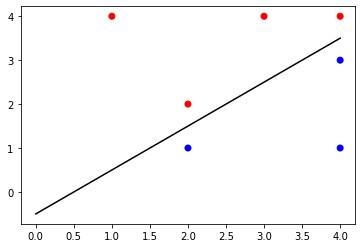

In [593]:
# Constructing the scatter plot
X1 = [3,2,4,1,2,4,4]
X2 = [4,2,4,4,1,3,1]
y = ["Red","Red","Red","Red","Blue","Blue","Blue"]

X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1]]) 
Y = [0] * 4 + [1] * 3
Y
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=y)


# adding the optimal separating hyperplane
betas = clf.coef_[0]
m = -betas[0]/betas[1]
xx = np.linspace(0, 4)
yy = m * xx - (clf.intercept_[0]) / betas[1]
pl.set_cmap(pl.cm.Paired)
pl.plot(xx, yy, 'k-')

The equation for the hyperplane line is $-1.0004096 + 1.9998464X_{1} -1.9996928X_{2} = 0$

### (c)
Classify to Red if $-1.0004096 + 1.9998464X_{1} -1.9996928X_{2} > 0$ and classify to Blue when $-1.0004096 + 1.9998464X_{1} -1.9996928X_{2} \leq 0$

### (d/e)

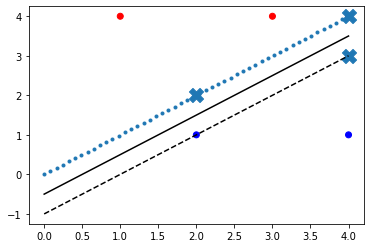

In [599]:
#the margin for the maximal margin hyperplane.
b_max = clf.support_vectors_[0]
yy_max = m * xx + (b_max[1] - m * b_max[0])
plt.set_cmap(pl.cm.Paired)
plt.plot(xx, yy_max, '.')
pl.plot(xx, yy, 'k-')
b_min = clf.support_vectors_[-1]
yy_min = m * xx + (b_min[1] - m * b_min[0])
plt.plot(xx, yy_min, 'k--')
plt.set_cmap(pl.cm.Paired)

# this indicate the support vectors for the maximal margin classifer
plt.scatter(X[:, 0], X[:, 1], c=y)
new = np.array([[2.,2.],[4.,3.],[4.,4.]])
plt.scatter(new[:, 0], new[:, 1],
           s=200, marker="X")
plt.show()

### (f)
Since the 7th observation is not a support vector, a slight movement from the observation would not affect the maximal margin hyperplane. The 7th observation would only affect the maximal margin hyperplane if it starts to move within the margin for the maximal margin hyperplane and become a support vector. 

### (g)

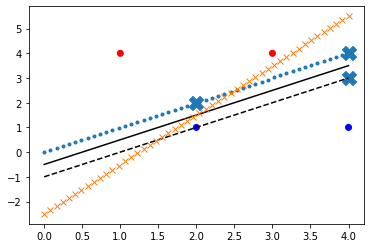

In [597]:
# adding the optimal separating hyperplane
pl.set_cmap(pl.cm.Paired)
pl.plot(xx, yy, 'k-')
plt.plot(xx, yy_max, '.')
plt.plot(xx, yy_min, 'k--')
xxx = np.linspace(0, 4)
yyy = 2*m * xxx - (5*(clf.intercept_[0]) / betas[1])
plt.plot(xxx, yyy, 'x')

# this indicate the support vectors for the maximal margin classifer
plt.scatter(X[:, 0], X[:, 1], c=y)
new = np.array([[2.,2.],[4.,3.],[4.,4.]])
plt.scatter(new[:, 0], new[:, 1],
           s=200, marker="X")
plt.show()

The equation for this hyperplane is $-4.0008192 + 9.999232X_{1} -9.998464X_{2} = 0$

Our program outputted three support vectors, however, there is another vector that is on the maximal margin classifer line at [2,1]. For simplicity, we will keep the support vectors orginally outputted by the program.

### (h)

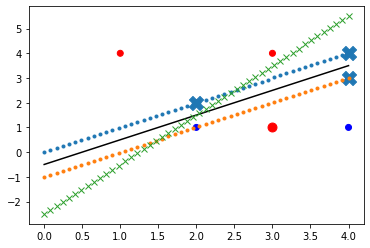

In [598]:
# adding the optimal separating hyperplane
pl.set_cmap(pl.cm.Paired)
pl.plot(xx, yy, 'k-')
plt.plot(xx, yy_max, '.')
plt.plot(xx, yy_min, '.')
xxx = np.linspace(0, 4)
yyy = 2*m * xxx - (5*(clf.intercept_[0]) / betas[1])
plt.plot(xxx, yyy, 'x')

# this indicate the support vectors for the maximal margin classifer
plt.scatter(X[:, 0], X[:, 1], c=y)
new = np.array([[2.,2.],[4.,3.],[4.,4.]])
plt.scatter(new[:, 0], new[:, 1],
           s=200, marker="X")

x2 = 3.0
y2 = 1

# adding an additio0nal observation on the plot so that the two classes
# are no longer separable by the hyperplane
plt.scatter(x2, y2, c='red',s=80)
plt.show()



\textbf{Pledge:}
\hspace{0.3in}Please sign below (print full name) after checking ($\checkmark$)  the following. If you can not honestly check each of these responses, please email me at kbala@ucdavis.edu to explain your situation.
\begin{itemize}
\item We pledge that we are honest students with academic integrity and we have not cheated on this homework.

\item These answers are our own work.

\item We did not give any other students assistance on this homework.

\item We understand that to submit work that is not our own and pretend that it is our is a violation of the UC Davis code of conduct and will be reported to Student Judicial Affairs.

\item We understand that suspected misconduct on this homework will be reported to the Office of Student Support and Judicial Affairs and, if established, will result in disciplinary sanctions up through Dismissal from the University and a grade penalty up to a grade of 'F' for the course.
\end{itemize}
Team Member 1: Truc Le
\hspace{2in}
Team Member 2: Alexander Chernikov

